<a href="https://colab.research.google.com/github/chaiminwoo0223/Data-Analysis/blob/main/practice_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from tqdm import tqdm
titles = []
contents = []
for n in tqdm(range(1,300,10)):
    url = requests.get(f"https://search.naver.com/search.naver?where=news&sm=tab_jum&query=%EB%B8%94%EB%9E%99%ED%8C%AC%EC%84%9C2") # 블랙팬서 : 와칸다 포에버
    html = BeautifulSoup(url.text)
    for i in html.select('ul.list_news')[0].select('li.bx'):
        title = i.select('a.news_tit')[0].text
        content = i.select('div.news_dsc')[0].text
        titles.append(title)
        contents.append(content)
df_news = pd.DataFrame({'title' : titles, 'content' : contents})

100%|██████████| 30/30 [00:33<00:00,  1.11s/it]


In [2]:
!pip install jpype1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import re
import konlpy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import PIL

In [6]:
df_news

,title,content
0,"11월 극장가 흥행 시장, ‘블랙 팬서2’ 울고 vs ‘올빼미’ 활짝 웃고","25.2%(60억) 증가했으나, 전년 동월 대비로는 39.6%(196억) 감소했..."
1,"블랙핑크 제니, 스타랭킹 女아이돌 TOP3 수성",걸그룹 블랙핑크 제니가 스타랭킹 여자 아이돌 부문 3위를 지켰다. 제니는 12월...
2,"11월 韓 영화 산업 매출액, 코로나19 이후 첫 연간 누적 1조 돌파 [무비노트]",'블랙 팬서: 와칸다 포에버'의 부진은 외국영화 매출액 변화에도 영향을 끼쳤다....
3,[인터뷰] '블랙팬서2' 꺾은 한국 영화 '올빼미'…'왕의 남자' 조감독의 51살 ...,“데뷔가 이렇게 오래 걸릴 줄 알았다면 안 했을 것 같아요” 올해 가장 긴 기간...
4,[스프] 위기의 마블 유니버스…'마블 영화'가 불안하다,그리고 페이즈4의 마지막 작품인 '블랙 팬서: 와칸다 포에버'를 통해 슈리가 채...
...,...,...
295,"[D:영화 뷰] '블랙팬서2' 잡은 '올빼미', 한국 영화 자존심 지켰다",2억 5000만달러(한화 약 3352억 원)가 투입된 마블 스튜디오의 '블랙팬서...
296,"[공식] 마블 체면 구긴 '블랙 팬서2', 20일만에 가까스로 200만 기록 돌파","마블의 액션 영화 '블랙 팬서: 와칸다 포에버'(이하 '블랙 팬서2', 라이언 ..."
297,"[SC초점] '블랙팬서2' 흥행 실패로 턱 밑 위기 몰린 디즈니, 13년 기다린 '...",'이터널스'를 시작으로 '블랙 팬서: 와칸다 포에버'(이하 '블랙 팬서2')까지...
298,[12월 2주 북미 박스] <블랙 팬서: 와칸다 포에버> 북미 수익 4억 달러 돌파,전주와 비교해 개봉작들의 큰 순위 변동이 없는 가운데 <블랙 팬서: 와칸다 포에...


In [7]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    300 non-null    object
 1   content  300 non-null    object
dtypes: object(2)
memory usage: 4.8+ KB


In [8]:
# 불필요한 문자 제거하기
df_news['title'] = df_news['title'].str.replace('[^가-힣]', ' ', regex = True)
df_news['title'].head()

0              월 극장가 흥행 시장   블랙 팬서   울고     올빼미  활짝 웃고
1                           블랙핑크 제니  스타랭킹  아이돌      수성
2         월   영화 산업 매출액  코로나   이후 첫 연간 누적  조 돌파  무비노트 
3     인터뷰   블랙팬서   꺾은 한국 영화  올빼미   왕의 남자  조감독의   살    
4                        스프  위기의 마블 유니버스  마블 영화 가 불안하다
Name: title, dtype: object

In [9]:
# kkma 만들기
kkma = konlpy.tag.Kkma()

In [10]:
# 명사 추출 - apply() 활용
nouns = df_news['title'].apply(kkma.nouns)
nouns

0                           [월, 극장가, 흥행, 시장, 블랙, 팬, 올빼미]
1           [블랙, 블랙핑크, 핑크, 스타, 스타랭킹, 랭킹, 아이, 아이돌, 돌, 수성]
2      [월, 영화, 산업, 매출액, 코로나, 이후, 연간, 누적, 조, 돌파, 무비, 무...
3          [인터뷰, 블랙, 블랙팬, 팬, 한국, 영화, 올빼미, 왕, 남자, 조감독, 살]
4           [스프, 위기, 마블, 유니, 유니버스, 버스, 영화, 불안, 불안하다, 하다]
                             ...                        
295                    [영화, 뷰, 블랙, 블랙팬, 팬, 올빼미, 한국, 자존심]
296                [공식, 마블, 체면, 블랙, 팬, 일, 일만, 만, 기록, 돌파]
297        [초점, 블랙, 블랙팬, 팬, 흥행, 실패, 턱, 밑, 위기, 디즈니, 년, 아]
298     [월, 주, 북미, 박스, 블랙, 팬, 포, 포에버, 에버, 수익, 억, 달러, 돌파]
299                                  [블랙, 블랙팬서, 팬, 서, 만]
Name: title, Length: 300, dtype: object

In [11]:
# 한 행에 한 단어가 들어가도록 구성
nouns = nouns.explode()
nouns

0         월
0       극장가
0        흥행
0        시장
0        블랙
       ... 
299      블랙
299    블랙팬서
299       팬
299       서
299       만
Name: title, Length: 2970, dtype: object

In [12]:
# 데이터 프레임 만들기
df_word = pd.DataFrame({'word' : nouns})
# 글자 수 추가하기
df_word['count'] = df_word['word'].str.len()
# 두 글자 이상 단어만 남기기
df_word = df_word.query('count >= 2')
df_word

,word,count
0,극장가,3
0,흥행,2
0,시장,2
0,블랙,2
0,올빼미,3
...,...,...
298,수익,2
298,달러,2
298,돌파,2
299,블랙,2


In [13]:
# 빈도표 만들기
df_word = df_word.groupby('word', as_index = False)\
                 .agg(n = ('word', 'count'))\
                 .sort_values('n', ascending = False)
df_word

,word,n
19,블랙,240
35,영화,120
7,돌파,90
36,올빼미,90
20,블랙팬,90
52,흥행,60
51,한국,60
10,마블,60
37,위기,60
39,유니버스,30


In [14]:
# 단어 빈도 상위 20개 추출하기
top20 = df_word.head(20)
top20

,word,n
19,블랙,240
35,영화,120
7,돌파,90
36,올빼미,90
20,블랙팬,90
52,흥행,60
51,한국,60
10,마블,60
37,위기,60
39,유니버스,30


In [15]:
# 한글폰트 설정하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

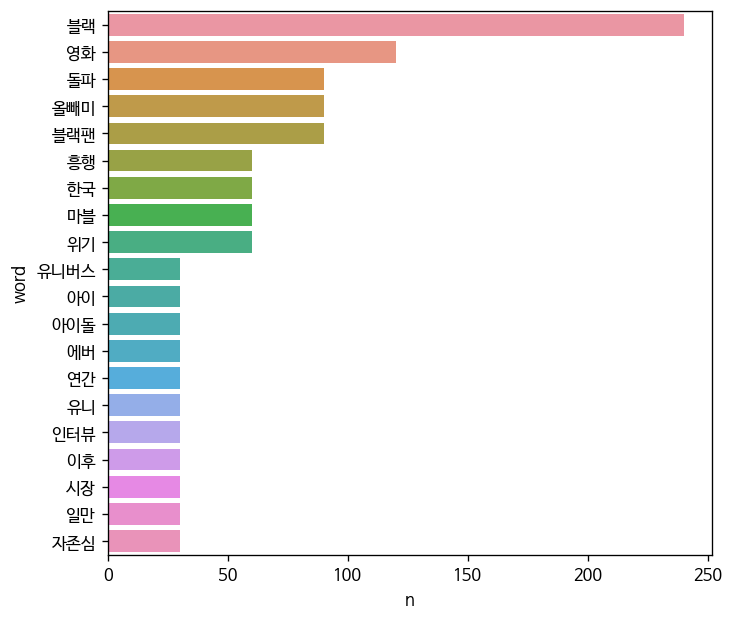

In [16]:
plt.rcParams.update({'font.family'    : 'NanumBarunGothic',
                     'figure.dpi'     : '120',
                     'figure.figsize' : [6.5, 6]})
# 막대 그래프 만들기
sns.barplot(data = top20, y = 'word', x = 'n')

In [17]:
# 데이터 프레임을 딕셔너리로 변환하기
dic_word = df_word.set_index('word').to_dict()['n']
dic_word

{'블랙': 240,
 '영화': 120,
 '돌파': 90,
 '올빼미': 90,
 '블랙팬': 90,
 '흥행': 60,
 '한국': 60,
 '마블': 60,
 '위기': 60,
 '유니버스': 30,
 '아이': 30,
 '아이돌': 30,
 '에버': 30,
 '연간': 30,
 '유니': 30,
 '인터뷰': 30,
 '이후': 30,
 '시장': 30,
 '일만': 30,
 '자존심': 30,
 '조감독': 30,
 '체면': 30,
 '초점': 30,
 '코로나': 30,
 '포에버': 30,
 '핑크': 30,
 '하다': 30,
 '실패': 30,
 '공식': 30,
 '스프': 30,
 '스타랭킹': 30,
 '기록': 30,
 '남자': 30,
 '노트': 30,
 '누적': 30,
 '달러': 30,
 '디즈니': 30,
 '랭킹': 30,
 '매출액': 30,
 '무비': 30,
 '무비노트': 30,
 '박스': 30,
 '버스': 30,
 '북미': 30,
 '불안': 30,
 '불안하다': 30,
 '블랙팬서': 30,
 '블랙핑크': 30,
 '산업': 30,
 '수성': 30,
 '수익': 30,
 '극장가': 30,
 '스타': 30}

In [18]:
font = '/content/drive/MyDrive/수업/데이터 분석 입문/강의자료/Data/DoHyeon-Regular.ttf'
icon = PIL.Image.open('/content/drive/MyDrive/수업/데이터 분석 입문/강의자료/Data/cloud.png')

In [19]:
img = PIL.Image.new('RGB', icon.size, (255, 255, 255))
img.paste(icon, icon)
img = np.array(img)
img.shape

(467, 825, 3)

In [20]:
# wc 만들기
from wordcloud import WordCloud
wc = WordCloud(random_state = 1234, font_path = font, width = 400, height = 400, background_color = 'white', mask = img)

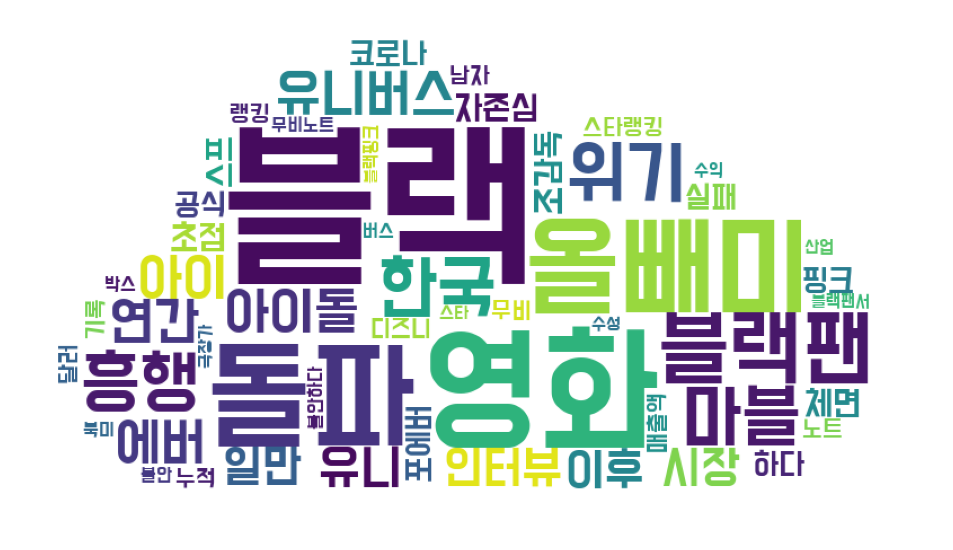

In [21]:
# 워드 클라우드 만들기
img_wordcloud = wc.generate_from_frequencies(dic_word)
# 워드 클라우드 출력하기
plt.figure(figsize = (10,10))
plt.axis('off')
plt.imshow(img_wordcloud)